In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
    )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_can.shape

(195, 51)

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)


In [7]:
df_can.columns = list(map(str, df_can.columns))

In [9]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_can['Total'] = df_can.sum(axis=1)

In [14]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [15]:
years = list(map(str, range(1980, 2014)))


In [16]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [22]:

df_continents = df_can.groupby('Continent',axis=0).sum()

In [23]:
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,38543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,618948.0
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,155075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3317794.0
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,28691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1410947.0
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,765148.0
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241142.0


In [26]:
df_can['Total']= df_can.sum(axis=1)

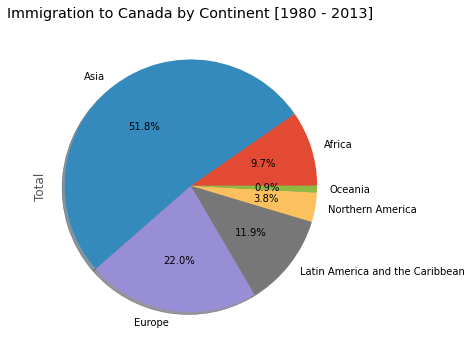

In [29]:
df_continents['Total'].plot(kind='pie',figsize=(5, 6),autopct='%1.1f%%', startangle=0,shadow=True)

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')

plt.show()

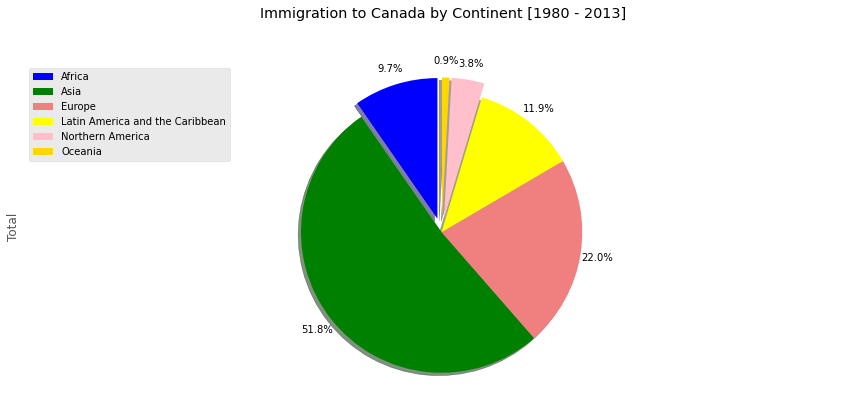

In [42]:
colors= ['blue','green','lightcoral','yellow','pink','gold']
explode = [0.1,0,0,0,0.1,0.1]

df_continents['Total'].plot(kind='pie', figsize=(15,6),pctdistance=1.12, autopct='%1.1f%%', startangle=90, shadow=True, labels= None, colors = colors, explode=explode)
plt.title('Immigration to Canada by Continent [1980 - 2013]',y=1.12)
plt.axis('equal')
plt.legend(labels=df_continents.index,loc='upper left')

plt.show()

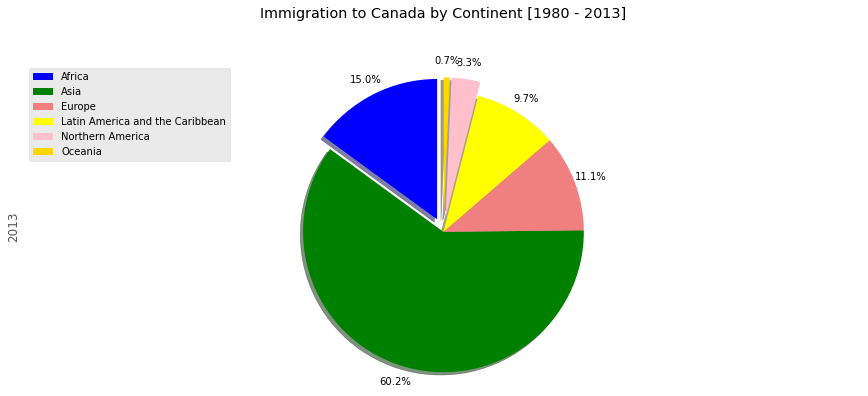

In [43]:
colors= ['blue','green','lightcoral','yellow','pink','gold']
explode = [0.1,0,0,0,0.1,0.1]

df_continents['2013'].plot(kind='pie', figsize=(15,6),pctdistance=1.12, autopct='%1.1f%%', startangle=90, shadow=True, labels= None, colors = colors, explode=explode)
plt.title('Immigration to Canada by Continent [1980 - 2013]',y=1.12)
plt.axis('equal')
plt.legend(labels=df_continents.index,loc='upper left')

plt.show()

In [44]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Text(0, 0.5, 'Number of Immigrants')

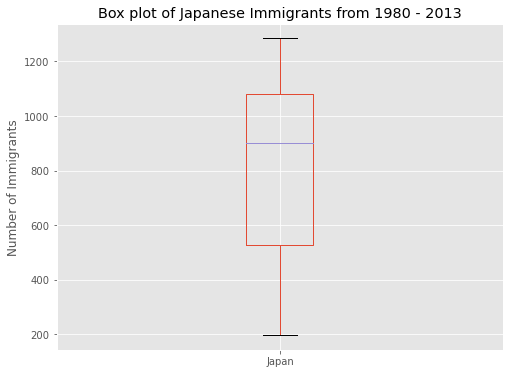

In [48]:
df_japan.plot(kind='box',figsize=(8,6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

In [53]:
df_CI = df_can.loc[['China','India'],years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Text(0, 0.5, 'Number of Immigrants')

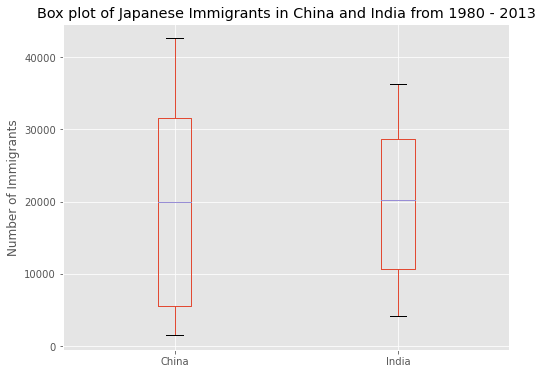

In [55]:
df_CI.plot(kind='box',figsize=(8,6))
plt.title('Box plot of Japanese Immigrants in China and India from 1980 - 2013')
plt.ylabel('Number of Immigrants')

In [58]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


# If we want to create horizontal boxplot

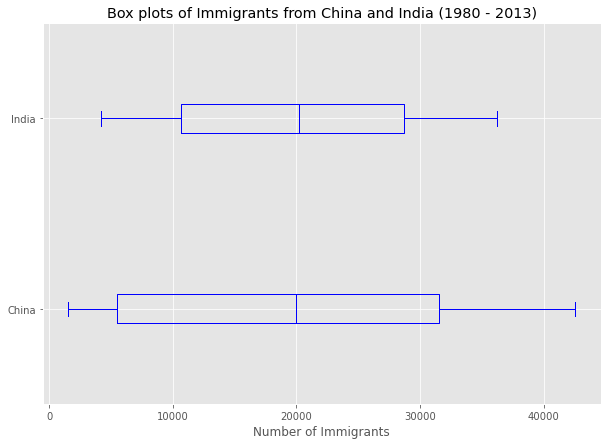

In [59]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

# Analysis along with plot

In [ ]:
fig = plt.figure()

ax0= fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)